# Predictive model of the houses sale price

## Andreas Christofi


## 1. Setup

### 1.1 Libraries

In [1]:
# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 70

# sklearn modules
import sklearn
import math
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

### 1.2 Data

Below is a brief discussion of the included features and their descriptions,

* `sale_price` - Sale price (USD) 
* `year_sold` -  Year the house sold
* `year_built` -  Year the house was built
* `lot_area` - Area of the lot (sq ft)
* `basement_area` - Area of the basement (sq ft)
* `living_area` - Area of the above ground living area (sq ft)
* `full_bath` - Number of full baths
* `half_bath` - Number of half baths
* `bedroom` - Number of bedrooms
* `garage_cars` - Size of garage (car capacity)
* `garage_area` - Size of garage (sq ft)
* `ac` - Does the house have air conditioning (Y, N)
* `zoning` - General zoning classification of the sale (low, medium, high density).
* `neighborhood` - Neighborhood within the city (nb_01, ..., nb_24)
* `quality` - Rating of the overall material and finish of the house (poor, fair, average, good, excellent)
* `condition` - Rating of the overall condition of the house (poor, fair, average, good, excellent)

In [2]:
sales = pd.read_csv("sales.csv")
sales_test = pd.read_csv("sales_test.csv")

## 2. Exploratory Data Analysis and Preprocessing

In [3]:
# Check for missing values
sales.isnull().sum()

sale_price       0
year_sold        0
year_built       0
lot_area         0
basement_area    0
living_area      0
full_bath        0
half_bath        0
bedroom          0
garage_cars      0
garage_area      0
ac               0
zoning           0
neighborhood     0
quality          0
condition        0
dtype: int64

**We observed that there are no missing values.**

In [4]:
# Check the mean and other features of the variables
sales.describe()

,sale_price,year_sold,year_built,lot_area,basement_area,living_area,full_bath,half_bath,bedroom,garage_cars,garage_area
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,174600.288510,2007.853535,1968.586490,10218.880051,1027.724116,1479.148359,1.532197,0.368687,2.889520,1.726010,458.529040
std,72033.178387,1.312273,28.781159,7779.644405,415.712287,496.674673,0.555429,0.498061,0.813525,0.724575,198.809388
min,35000.000000,2006.000000,1872.000000,1470.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129000.000000,2007.000000,1952.000000,7530.750000,788.750000,1093.750000,1.000000,0.000000,2.000000,1.000000,308.000000
50%,156225.000000,2008.000000,1970.000000,9579.000000,971.500000,1430.000000,2.000000,0.000000,3.000000,2.000000,462.000000
75%,203033.750000,2009.000000,1995.250000,11482.250000,1248.000000,1734.750000,2.000000,1.000000,3.000000,2.000000,576.000000
max,755000.000000,2010.000000,2009.000000,164660.000000,3206.000000,4316.000000,4.000000,2.000000,6.000000,5.000000,1231.000000


# Visual Analysis of the Data

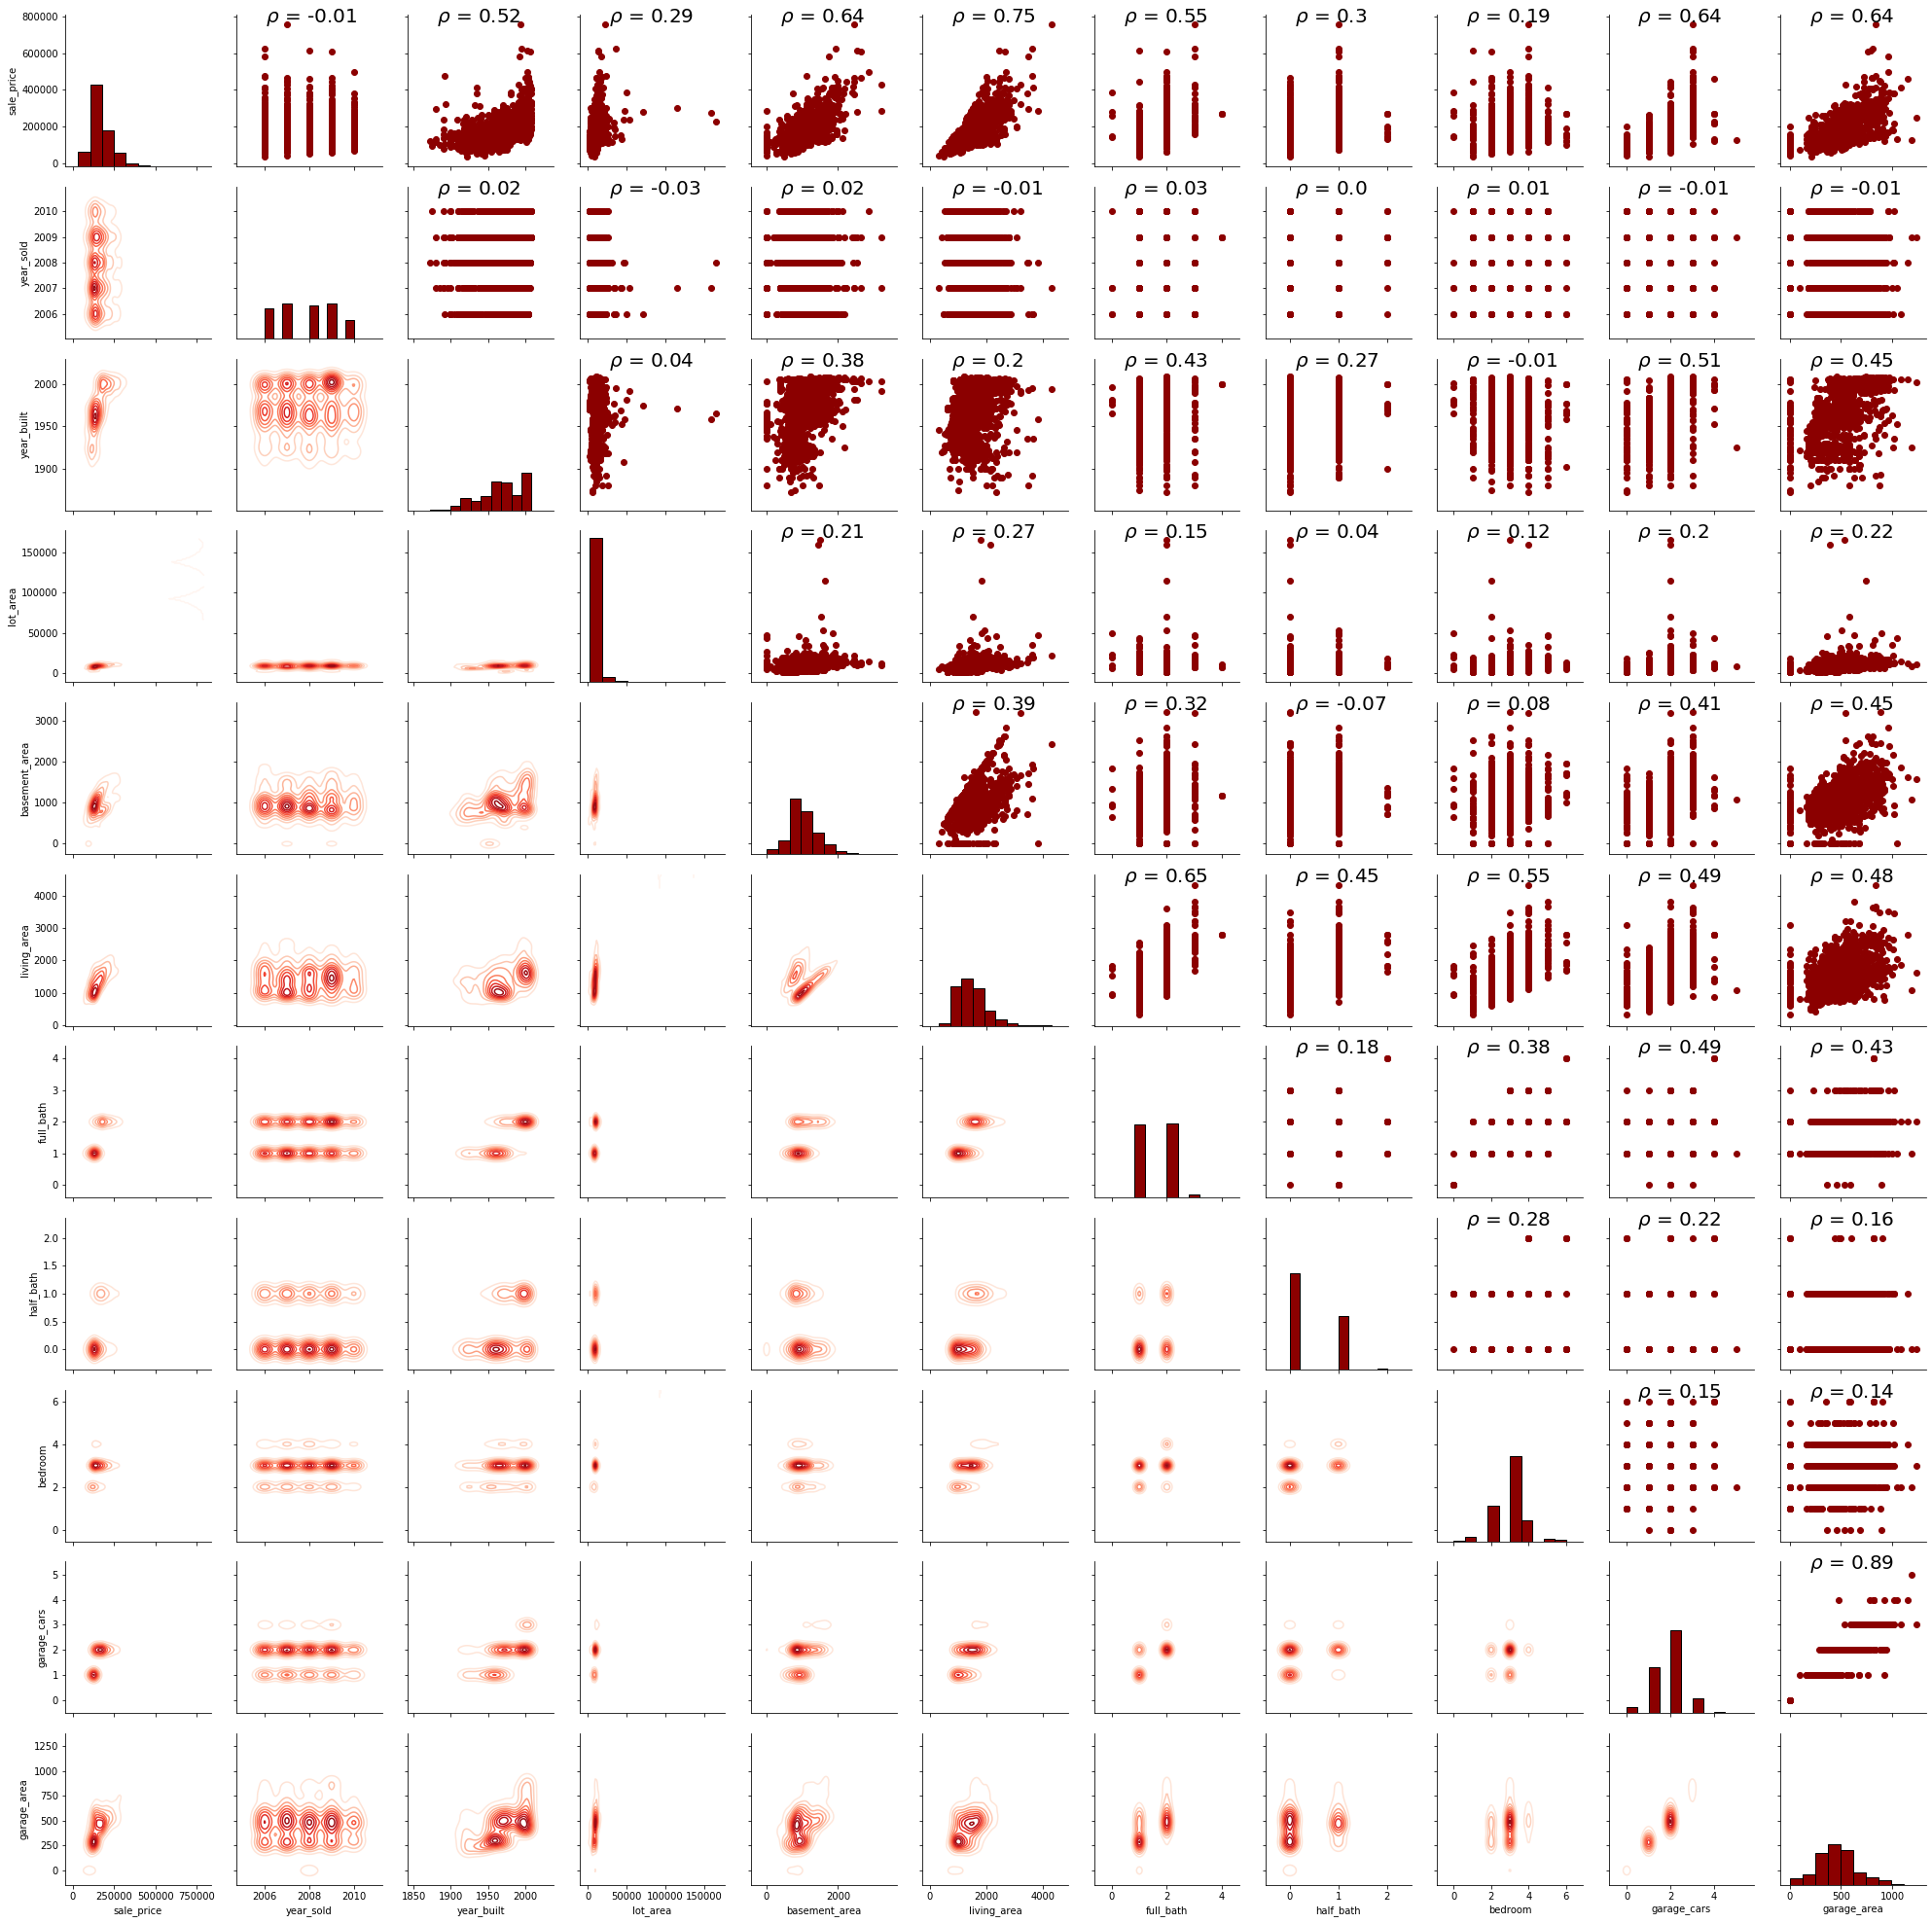

In [5]:
cols = ['sale_price', 'year_sold', 'year_built', 'lot_area', 'basement_area',
       'living_area', 'full_bath', 'half_bath', 'bedroom', 'garage_cars',
       'garage_area']
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(sales[cols])

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');

The following variables are categorical : 
* ac 
* zoning 
* neighborhood 
* quality 
* condition



zoning, quality and condition in particular are ordinal variables.

Moreover, full_bath (Number of full baths), half_bath (Number of half baths),bedroom (Number of bedrooms),garage_cars (car capacity), seem to be categorical variables because they can take only integers however they are not categorical variables.


It can be observed that *living_area* has the best relationship with *sale_price*, as the **correlation is equal to 0.75**. Moreover it can be seen that some of the numerical variables like *sale_price*, *lot_area* and *living_area* have **high skewness**. 

Furthermore, the **correlation between *garage_cars* and *garage_area*** is high which is something that we expected and the **corellation of these two variables with sale_price is the same (0.64)**.

For further study of the features of the data we make some plots to see the relationship between the *sale_price* and the explanotary variables.


### Check the categorical variables

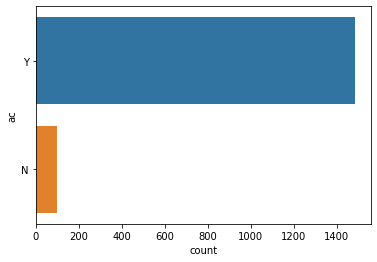

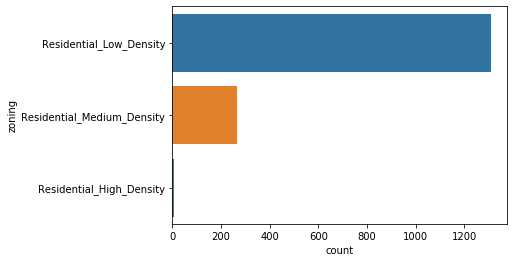

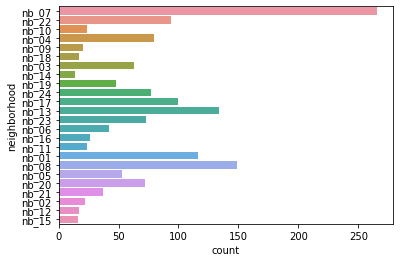

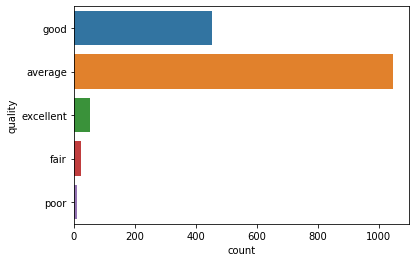

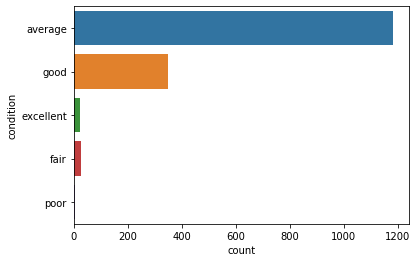

In [6]:
for col in ["ac","zoning","neighborhood","quality","condition"]:
    sns.countplot(y=col, data=sales)
    plt.show()

From the plots above of the categorical variables, it we check which categories has the most  values. We can see that :  
-  Most of the houses have ac.
-  The zoning of most of the houses is low.
-  Most of the houses are in neighbarhood number 7.
-  The quality of the most of the properties is average.
-  The condition most of the properties is average.


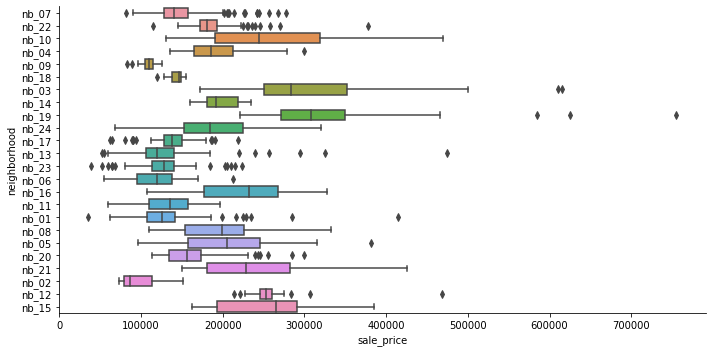

In [7]:
# neighborhood & sale_price
sns.catplot(x = "sale_price",y = "neighborhood",kind = "box", data = sales,aspect = 2);

It can be noted that the sale price in some neighborhoods is higher. 

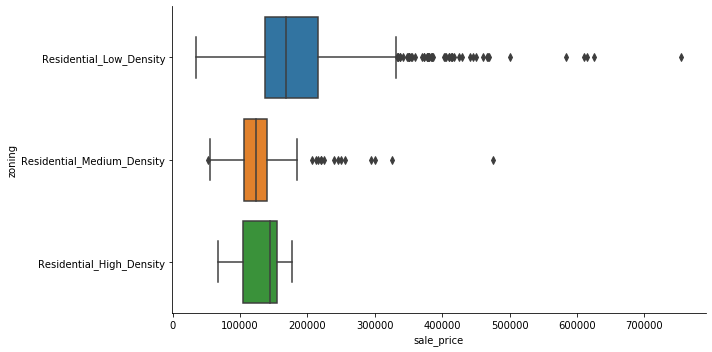

In [8]:
# zoning & sale_price
sns.catplot(x = "sale_price",y = "zoning",kind = "box", data = sales,aspect = 2);

According to the box plot above, the Residential Low Density has highest sale price values, however the differences between the prices of the three categories are not so high.

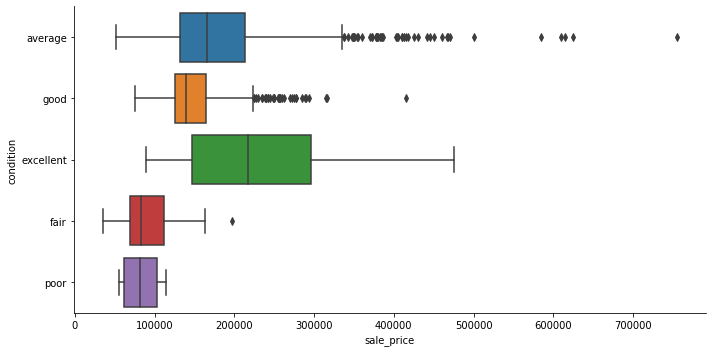

In [9]:
#condition & sale_price
sns.catplot(x = "sale_price",y = "condition",kind = "box", data = sales,aspect = 2);

We can see something that we expected, that the better the condition of the house the higher its price.

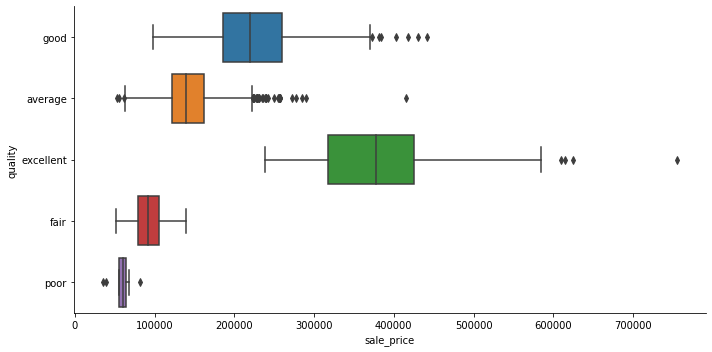

In [10]:
# quality and sale_price
sns.catplot(x = "sale_price",y = "quality",kind = "box", data = sales,aspect = 2);

The same as before with the variable of condition, it is clear that the better the quality of the house the higher its price. Although, the difference between quality categories is more clear than for the condition ones.

### Check the numerical variables

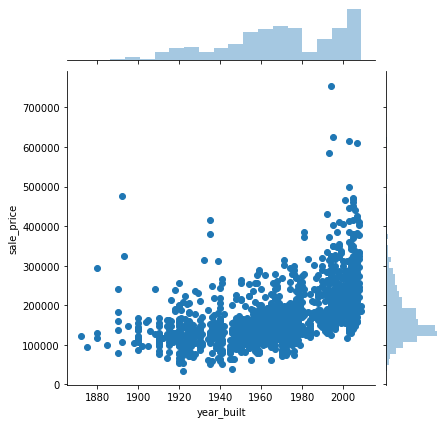

In [11]:
# sale-price & year_built
sns.jointplot(x=sales['year_built'], y=sales['sale_price']);

From the above  graph we can notice that the sale price of a property has an icreasing trend throughout the years.

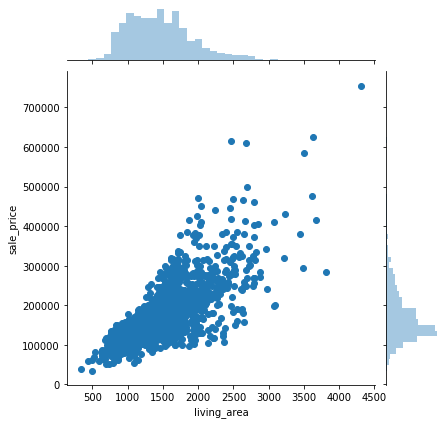

In [12]:
# living_area & sale_price
sns.jointplot(x=sales['living_area'], y=sales['sale_price']);

From the plot it should be pointed out that the sale price is commensurate with living area.

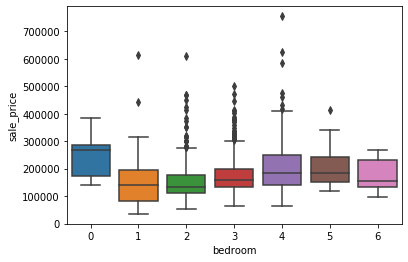

In [13]:
# bedrooms & sale_price
sns.boxplot(x=sales['bedroom'], y=sales['sale_price']);

The highest sale price corresponds to the properties with no bedrooms.That does not make much sense. Probably the reason for that is the outliers.

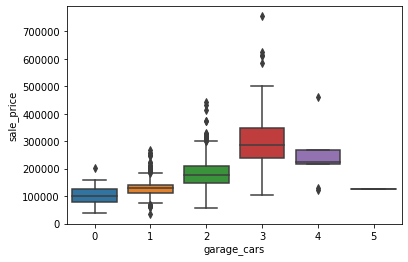

In [14]:
# garage_cars & sales price
sns.boxplot(x=sales['garage_cars'], y=sales['sale_price']);

As  the size of garage (car capacity) is increased the sale price is increased too. However, because of outliers 4-car and 5-car garages result in less sale price.

# Scaling and Transforming
Before using of any modeling method we have to transform and scale the data.
First we have to check the **skewness** of all the numerical variables and fix all of the skewed data to be more normal so that our models will be more accurate when making predictions.

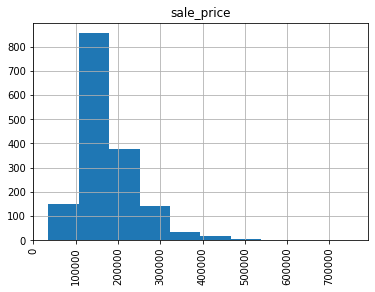

In [15]:
# check the distribution of sale_price
sales.hist(column='sale_price');
plt.xticks(rotation=90);

From the histogram it can be observed that sale_price is very right skewed so we have to transform it with log(sale_price+1). In this way log(scale_price+1) gives a symmetric and more "normal" distribution.

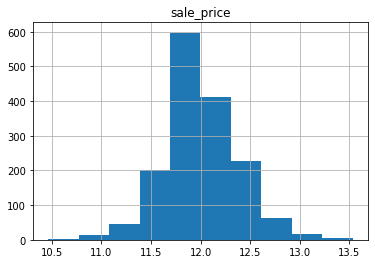

In [16]:
sales['sale_price'] = np.log(sales['sale_price']+1)
sales_test['sale_price'] = np.log(sales_test['sale_price']+1)
sales.hist(column='sale_price');

In [18]:
# Check the skew of all numerical features
numeric_feats = sales.dtypes[sales.dtypes != "object"].index
skewed_feats = sales[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness

,Skewed Features
lot_area,11.782904
living_area,1.008922
half_bath,0.727706
basement_area,0.529231
full_bath,0.348596
sale_price,0.257093
garage_area,0.221875
bedroom,0.211698
year_sold,0.073479
garage_cars,-0.050316


**lot_area** and **living_area** are very right skewed so we have to **transform** them.

In [19]:
sales['lot_area'] = np.log(sales['lot_area']+1)
sales['living_area'] = np.log(sales['living_area']+1)
sales_test['lot_area'] = np.log(sales_test['lot_area']+1)
sales_test['living_area'] = np.log(sales_test['living_area']+1)
skewed_feats = sales[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness

,Skewed Features
half_bath,0.727706
basement_area,0.529231
full_bath,0.348596
sale_price,0.257093
garage_area,0.221875
bedroom,0.211698
year_sold,0.073479
living_area,-0.034807
garage_cars,-0.050316
lot_area,-0.492482


**Scale** all features to be on a common scale before fitting the models. We subtract the mean of each feature and then divide by the standard deviation - this results in each feature column having a mean of 0 and a variance of 1. 

But the first thing that we do is to **remove *garage_cars*** from the explanatory variables. As we noticed before,the **correlation** between *garage_cars* and *garage_area* is **high** which is something that we expected and the corellation between these two variables with *sale_price* is the same (0.64).

In [20]:
# scaling all the explanatory variables except of sale_price and removing the garage_cars
cols = [ 'year_sold', 'year_built', 'lot_area', 'basement_area',
       'living_area', 'full_bath', 'half_bath', 'bedroom', 
       'garage_area']
X_train = sales.drop(['sale_price','garage_cars'], axis=1)
X_test = sales_test.drop(['sale_price','garage_cars'], axis=1)
S = StandardScaler().fit(X_train[cols])
S_test = StandardScaler().fit(X_test[cols])
X_train[cols] = S.transform(X_train[cols])
X_test[cols] = S.transform(X_test[cols])

We use *one hot encoding* for **transforming categorical variables**

In [21]:
# One hot encoding for transforming categorical variables 
categ = ['ac','zoning','neighborhood','quality','condition']
X_train = pd.get_dummies(X_train, prefix_sep="_", columns = categ)
X_test = pd.get_dummies(X_test, prefix_sep="_", columns = categ)

## 3. Model Fitting and Tuning

We have two data sets, sales and sales_test. We use sales for trainning and to measure the 5-fold cross validated RMSE. Furthermore, we measure the performance of the models on unseen data, sales_test.

We applied 7 models : **Simple Linear Regression** , **Lasso Regression**, **Ridge  Regression**, **Regression Trees**, **Kernel Ridge**, **Decision Trees** and **Random Forest**.  
Comparing the errors (Root-mean-square error (RMSE) with Cross Validation) of these models we came up with the choice of the **Ridge Regression** model which has the smallest error (RMSE). Moreover,the R-squared of the Ridge Regression model is the highest.

Thniking that except of a low value of RMSE and the performance of a model, it is important to have a simple model with the most important coefficients.

As a result of that we have reduced the number of explanatory variables (with RFE method) so that we have a more flexible model, with the aim of minimizing error (RMSE), by removing explanatory variables with high correlation or with little contribution to the estimation.

**Simple Linear Regression**, which has a low RMSE value too, is rejected because with **Ridge Regression** we do regularization also. **Lasso Regression**, even though do regularization and is a method which select features, is rejected because of the higher RMSE.The **Random Forest** is rejected because even after hyperparameter tuning, the errors appeared to be higher than **Ridge Regression**.
The rest of the methods that were tried are rejected because of thei highier RMSE value and their lower R-squared.  

In [22]:
y_train = sales.sale_price
y_test = sales_test.sale_price

In [23]:
# For Recursive feature elimination (RFE) (selects features by recursively considering smaller and smaller sets of features)
def run_rfe_and_score_best_feature(model, x_train, y_train, x_test, y_test, n):
    print('--------------------------------------------------------------')
    print("Running ",type(model).__name__)
    
    selector = RFE(model, n, step=1)
    selector = selector.fit(x_train,y_train)

    features = get_top_features(x_train, selector.ranking_)
    
    model.fit(x_train[features],y_train)
    preds=model.predict(x_test[features])
    
    error = math.sqrt(mean_squared_error(y_test,preds))
    
    scores = cross_validate(model, x_train[features],y_train, cv=5, scoring="neg_mean_squared_error")
    
    error_cv = np.sqrt(abs(scores["test_score"])).mean()
    r2 = r2_score(y_test,preds)
    print(features)
    
    return [error,error_cv,r2,features]
        
    
def get_top_features(features, importances):
    zipped_and_sorted = sorted(zip(features, importances), key=lambda x: x[1])
    result = [x[0] for x in zipped_and_sorted if x[1] == 1]
    return result


# fit the model, predict and calculate error, cross validation error and r-square
def run_model(model, x_train, y_train, x_test, y_test, plot=False):
    print('--------------------------------------------------------------')
    print("Running ",type(model).__name__)
    
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    
    error = math.sqrt(mean_squared_error(y_test,preds))
    
    scores = cross_validate(model, x_train,y_train, cv=5, scoring="neg_mean_squared_error")
    
    error_cv = np.sqrt(abs(scores["test_score"])).mean()
    
    r2 = r2_score(y_test,preds)
    
    res = pd.DataFrame(
        data = {'y': y_test, 'y_hat': preds, 'resid': y_test - preds}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='x', y='y', color="grey", data =  pd.DataFrame(data={'x': [min(y_test),max(y_test)], 'y': [min(y_test),max(y_test)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model rmse = " + str(round(error_cv, 4)), fontsize=16)
        plt.show()
    else:
        print("Model RMSE:\t",error,"\n10-fold CV RMSE:\t",error_cv,"\nR-squared:\t",r2)
    
    return [error,error_cv,r2]


# Baseline model 

Fit a baseline model which we will be able to use as a point of comparison for our subsequent models. A good candidate for this is DummyRegressor which is a regressor that makes predictions using simple rules.
This regressor is useful as a simple baseline to compare with other (real) regressors.


--------------------------------------------------------------
Running  DummyRegressor


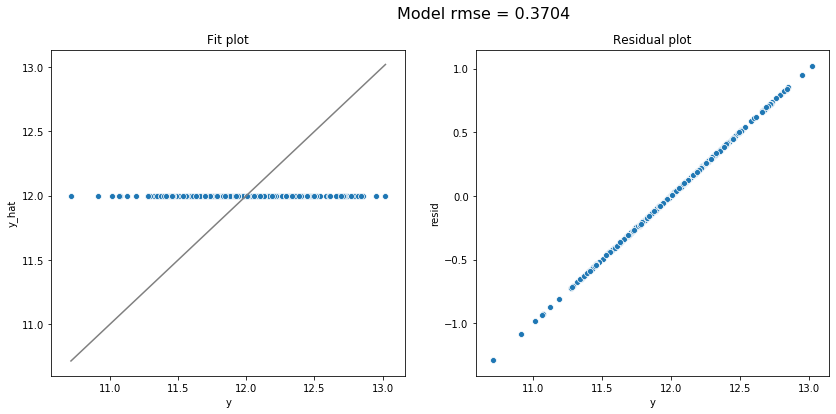

[0.3808330388946962, 0.37037945553494317, -1.0107009108528686e-05]

In [24]:
run_model(DummyRegressor(), X_train, y_train, X_test, y_test, True)

As we can see the **RMSE with cross validation** is equal to **0.37**, and the model is not the appropriate for sale price prediction.

# Ridge Regression
Ridge regression is a natural extension to linear regression which introduces an $\ell_2$ penalty on the coefficients to a standard least squares problem. Mathematically, we can express this as the following optimization problem,

$$ \underset{\boldsymbol{\beta}}{\text{argmin}} \; \lVert \boldsymbol{y} - \boldsymbol{X} \boldsymbol{\beta} \rVert^2 + \alpha (\boldsymbol{\beta}^T\boldsymbol{\beta}) $$ 

### Tune Ridge
We use different values of alpha in an attempt to identify the optimal value of $\alpha$ for our data before applying  apply the  **Ridge Reggresion** model.

In [25]:
%%capture
alphas = np.logspace(-2, 3, num=200) # from 10^-2 to 10^3

betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alphas:
    m = Ridge(alpha=a).fit(X_train, y_train)
    betas.append(m.coef_) # We ignore the intercept as it is not included in the l2 penalty and hence not shrunk
    rmses.append(run_model(Ridge(alpha=a), X_train, y_train, X_test, y_test)[1])


res = pd.DataFrame(
    data = betas,
    columns = X_train.columns # Label columns w/ feature names
).assign(
    alpha = alphas,
    rmse = rmses
).melt(
    id_vars = ('alpha', 'rmse')
)


In [26]:
from sklearn.model_selection import KFold

alphas = np.linspace(0, 15, num=151)

gs = GridSearchCV(
    Ridge(),
    param_grid={'alpha': alphas},
    cv=KFold(10, True, random_state=1234),
    scoring="neg_mean_squared_error"
).fit(X_train, y_train)

print(gs.best_params_)
a_r = gs.best_params_['alpha']


{'alpha': 1.4000000000000001}


**The optimal $\alpha$ = 1.4** 


Further explore for this choice of $\alpha$ .

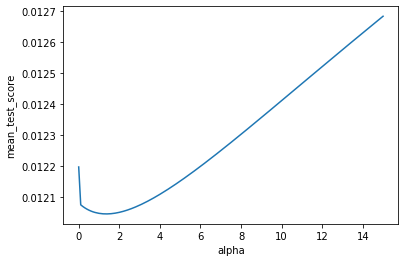

In [27]:
cv_res = pd.DataFrame(
    data = gs.cv_results_
).filter(
    # Extract the split#_test_score, mean_test_score, and std_test_score columns
    regex = '(split[0-9]+|mean)_test_score'
).assign(
    # Add the alphas as a column
    alpha = alphas
)

cv_res.update(
    # Convert negative rmses to positive
    -1 * cv_res.filter(regex = '_test_score')
)
sns.lineplot(x='alpha', y='mean_test_score', data=cv_res)
plt.show()

This plot clearly shows that the value 1.4 is obtained as the minimum of this curve. However, this plot gives us an overly confident view of this choice of this particular value of $\alpha$. Specifically, if instead of just plotting the mean rmse, we also examine the variablility of that estimate as well as examine the $\alpha$ vs rmse curve of each fold we see that these estimates are far noisier than they first appeared and we should take the value $\alpha = 1.4$ with a grain of salt.t.

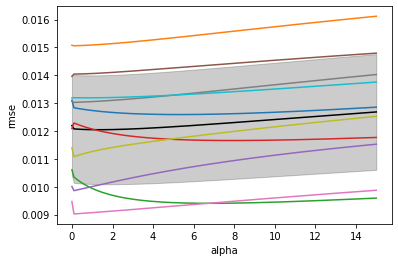

In [28]:
d = cv_res.melt(
    id_vars=('alpha','mean_test_score'),
    var_name='fold',
    value_name='rmse'
)

sns.lineplot(x='alpha', y='rmse', color='black', ci = 'sd', data = d)  # Plot the mean rmse +/- the std dev of the rmse.
sns.lineplot(x='alpha', y='rmse', hue='fold', data = d, legend = None) # Plot the curves for each fold
plt.show()

In the plot above the black line shows the mean rmse across the folds (this is the same curve as shown in the previous plot) and the gray interval indicates + and - 1 standard deviation of the rmses. The other colored cuves shows the rmse curve for each of the different folds.

In [29]:
run_model(Ridge(alpha=a_r), X_train, y_train, X_test, y_test)

--------------------------------------------------------------
Running  Ridge
Model RMSE:	 0.11115922518890667 
10-fold CV RMSE:	 0.10902047556614285 
R-squared:	 0.9148026326882966


[0.11115922518890667, 0.10902047556614285, 0.9148026326882966]

**The cross validation error = 0.1090** and this model performs better (smaller rmse) than the baseline model.

--------------------------------------------------------------
Running  Ridge


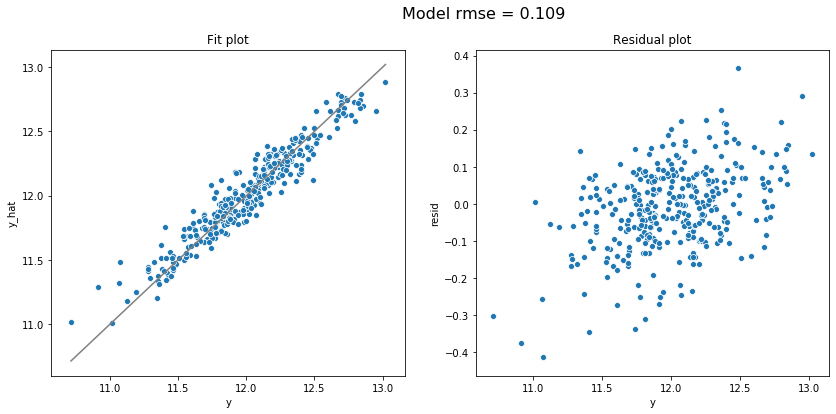

[0.11115922518890667, 0.10902047556614285, 0.9148026326882966]

In [30]:
run_model(Ridge(alpha=a_r), X_train, y_train, X_test, y_test, True)

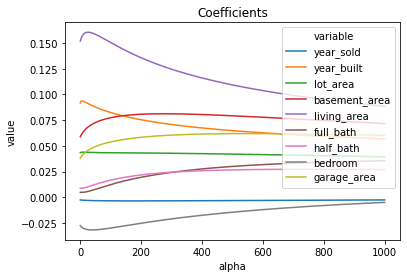

In [31]:
sns.lineplot(x='alpha', y='value', hue='variable', data=res[[True if var in cols else False for var in res.variable]]).set_title("Coefficients")
plt.show()

We can use **recursive feature elimination (RFE)** to select features, in the **Ridge regression** model. Recursive feature elimination (**RFE**) selects features by recursively considering smaller and smaller sets of features, removing one at a time. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached. We check for the lowest RMSE for all the models tha include from 1 to 49 explanatory variables.

In [32]:
%%capture
results = pd.DataFrame(columns=['RMSE', 'RMSE_CV', 'R2'])
for i in range(1,49,1):
    results.loc[i] = run_rfe_and_score_best_feature(Ridge(alpha=a_r), X_train, y_train, X_test, y_test,i)[:3]

In [33]:
results[results.RMSE_CV==min(results.RMSE_CV)]

,RMSE,RMSE_CV,R2
32,0.11198,0.10868,0.913539


**We observe that the best model contains 32 variables and the corresponding error is 0.10868.**

In [34]:
features=run_rfe_and_score_best_feature(Ridge(alpha=a_r), X_train, y_train, X_test, y_test,32)[3]

--------------------------------------------------------------
Running  Ridge
['year_built', 'lot_area', 'basement_area', 'living_area', 'bedroom', 'garage_area', 'ac_N', 'ac_Y', 'zoning_Residential_High_Density', 'zoning_Residential_Low_Density', 'neighborhood_nb_01', 'neighborhood_nb_02', 'neighborhood_nb_03', 'neighborhood_nb_05', 'neighborhood_nb_10', 'neighborhood_nb_12', 'neighborhood_nb_14', 'neighborhood_nb_15', 'neighborhood_nb_16', 'neighborhood_nb_18', 'neighborhood_nb_19', 'neighborhood_nb_21', 'neighborhood_nb_23', 'quality_average', 'quality_excellent', 'quality_fair', 'quality_good', 'quality_poor', 'condition_excellent', 'condition_fair', 'condition_good', 'condition_poor']


The optimal $\alpha$ now is :  **$\alpha$ = 1.4**  and the **MSRE = 0.10868**

So the final model contains the following explanatory variables : 
-  year_built
-  lot_area
-  basement_area
-  living_area
-  bedroom
-  garage_area
-  ac (Y,N)
-  quality
-  condition
-  zoning (High and Low)
-  neighborhood (1,2,3,5,10,12,14,15,16,18,19,21,23)

In the case of the categorical variables zoning and neighborhood we observe that after applying the RFE to select the most important varibales for the model, not all categories for each variable are selected. 

For the zoning we can see from the boxplot that the categories (High and Low ) which is selected are these one with the highest mean.

For the neighborhood we can see from the boxplot that the neighbarhood categories 1,2,18,23 have four of the lowest sale price and the categories 3,5,10,12,14,15,16,19,21 have the highest sale price.

In [35]:
model = Ridge(alpha=a_r).fit(X_train[features],y_train)
model.coef_

array([ 0.09962613,  0.04316357,  0.05634988,  0.16126184, -0.02791489,
        0.03824871, -0.04254743,  0.04254743, -0.05561991,  0.03375377,
       -0.04550753, -0.10425866,  0.0686301 ,  0.15055085,  0.08925024,
        0.07622196,  0.03518881,  0.06754059,  0.07314177,  0.04114775,
        0.13386903,  0.04725295,  0.05688303, -0.0347237 ,  0.26689407,
       -0.11826006,  0.06273798, -0.17664829,  0.20365943, -0.17122942,
        0.11451406, -0.21839656])

## 4. Discussion


Our final model is Ridge Regression model with the following explanatory variables : year_built, lot_area, basement_area, bedroom, living_area, garage_area, ac_N, 'ac_Y, zoning_Residential_High_Density, zoning_Residential_Low_Density, neighborhood_nb_01, neighborhood_nb_02, neighborhood_nb_03, neighborhood_nb_05, neighborhood_nb_10, neighborhood_nb_12, neighborhood_nb_14, neighborhood_nb_15, neighborhood_nb_16, neighborhood_nb_18, neighborhood_nb_19, neighborhood_nb_21, neighborhood_nb_23, quality_average, quality_excellent, quality_fair, quality_good, quality_poor, condition_excellent, condition_fair, condition_good, condition_poor.

**Ridge Regression** is one of the best known techniques for **regularization** which shrinks the estimated weights and can lead to substantial improvements in the performance of the model. 
**Regularization** is achieved by including a penalization term in the cost function, that is
we choose the estimate wb which minimizes the penalized RSS:
     $\sum (y_n - w^{T}x_n)^{2} + \sum p_\lambda (w_d)$

where $p_\lambda$ is a penalty function that penalizes for large weight values, with tuning
parameter λ.
Ridge regression penalizes the weights with $p_\lambda(w_d) = \lambda w_d^{2}$ 

The tuning parameter λ ≥ 0 controls the impact of the penalization relative to the RSS.
For λ = 0, the penalty term has no effect and ridge regression will produce the least
squares estimate. However, as λ grows, we trade-off the accuracy of the fit to make the
weights smaller in magnitude. In the limit as λ → ∞, the ridge regression estimates
approach zero.

The **Ridge Regression** model is chosen from the other models, because of its RMSE  with cross validation which is the lowest.Furthermore the R-squared of the Ridge Regression model is the highest. R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variables in a regression model.

The **Ridge Regression** is a method that does not select features, as Lasso Regression for example. As a result of that we applying **recursive feature elimination (RFE)** to select the most important features, which are mentioned above.

With this model we can acurate predict the sale price of a property without asking for all the features, but some of them.





In [36]:
coefs = pd.DataFrame({"features":features,"Coefficient":model.coef_})
coefs["Coefficient_abs"] = abs(coefs.Coefficient)
coefs.sort_values("Coefficient_abs",ascending=False)

,features,Coefficient,Coefficient_abs
24,quality_excellent,0.266894,0.266894
31,condition_poor,-0.218397,0.218397
28,condition_excellent,0.203659,0.203659
27,quality_poor,-0.176648,0.176648
29,condition_fair,-0.171229,0.171229
3,living_area,0.161262,0.161262
13,neighborhood_nb_05,0.150551,0.150551
20,neighborhood_nb_19,0.133869,0.133869
25,quality_fair,-0.118260,0.118260
30,condition_good,0.114514,0.114514


From the values of the **coefficients** we observe that *quality* and *condition* are the most important features of the prediction of the *sale price*. These two features are expected to contribute to the model as the *living_area* comes the third place. As we expected some coefficients are negative. For example, *ac_N* (No aircondition) or *quality_poor* are expected to have negative coefficients and indeed their coefficients significantly influence the predictions. Finaly, *garage_area* and *basement_area*, despite of having good correlation with the sale price (0.64), their **coefficients** have among the lowest impact on the prediction. 

In conclusion, the real estate agents have to pay attention to the quality, the conditions and the living_area.

## 5. Model Validation

We use the csv file called `sales_holdout.csv`  for assessing the predictive performance of our model. 

In [37]:
sales_holdout = pd.read_csv("sales_holdout.csv")

#scaling and transforming
sales_holdout['sale_price'] = np.log(sales_holdout['sale_price']+1)
sales_holdout['lot_area'] = np.log(sales_holdout['lot_area']+1)
sales_holdout['living_area'] = np.log(sales_holdout['living_area']+1)
cols = [ 'year_sold', 'year_built', 'lot_area', 'basement_area',
       'living_area', 'full_bath', 'half_bath', 'bedroom', 
       'garage_area']
X_holdout = sales_holdout.drop(['sale_price','garage_cars'], axis=1)
S_holdout = StandardScaler().fit(X_holdout[cols])
X_holdout[cols] = S_holdout.transform(X_holdout[cols])

# One hot encoding for transforming categorical variables 
categ = ['ac','zoning','neighborhood','quality','condition']
X_holdout = pd.get_dummies(X_holdout, prefix_sep="_", columns = categ)
y_holdout = sales_holdout.sale_price

#final model
final_model = Ridge(alpha=a_r).fit(X_train[features], y_train)

# Calculate the root mean squared error 
np.sqrt( sklearn.metrics.mean_squared_error(y_holdout, final_model.predict(X_holdout[features])) )

0.11137111102441605

**The root mean squared error = 0.111.** The error is close to the cross validated error and to the test error, even if our data is unseen. As a result of that we can say that our model is not uncertain because of its performance.  

In [38]:
pred = final_model.predict(X_holdout[features])
residuals = math.e**y_holdout-math.e**pred
residuals = pd.DataFrame({"res":residuals,"price":math.e**y_holdout, "percentage":abs(residuals)/math.e**y_holdout})
residuals.describe()

,res,price,percentage
count,350.000000,350.000000,350.000000
mean,976.339732,175018.448571,0.087195
std,20494.274921,68747.432233,0.076898
min,-49947.423913,45001.000000,0.000761
25%,-11590.960145,129001.000000,0.036286
50%,-256.208338,163251.000000,0.068612
75%,11880.355607,209351.000000,0.118537
max,108021.589386,451951.000000,0.506509


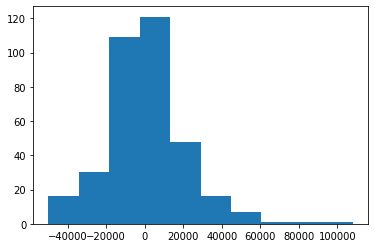

In [39]:
plt.hist(residuals.res);

After plotting the histogram of the residuals we observe that 50% of the residuals are within $ 10000 of the highest price.

Moreover we can see that 75 % of the predictions are diverged less than  11 % of their real sale price which establishes the model valid for real life usage.